In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

lap_times_df = pd.DataFrame(data=pd.read_csv('data/lap_times.csv'))

In [17]:
# specify to 2022 mexico race
mexico_lap_times_df = lap_times_df.loc[lap_times_df['raceId'] == 1094]

# select driver lap times over the course of the race
driver_0_lap_times = mexico_lap_times_df.loc[mexico_lap_times_df['driverId'] == 830, 'milliseconds']

# specify unique drivers during race
drivers = mexico_lap_times_df['driverId'].unique()

# function to get time from driverid
def get_lap_time(driver_id):

    driver_lap_times = mexico_lap_times_df.loc[mexico_lap_times_df['driverId'] == driver_id, 'milliseconds']
    
    return driver_lap_times

drivers_dict = {}
for driver in drivers:

    drivers_dict[driver] = get_lap_time(driver)


[Text(1, 0, '830'),
 Text(2, 0, '1'),
 Text(3, 0, '815'),
 Text(4, 0, '847'),
 Text(5, 0, '832'),
 Text(6, 0, '844'),
 Text(7, 0, '4'),
 Text(8, 0, '822'),
 Text(9, 0, '839'),
 Text(10, 0, '846'),
 Text(11, 0, '852'),
 Text(12, 0, '855'),
 Text(13, 0, '817'),
 Text(14, 0, '20'),
 Text(15, 0, '840'),
 Text(16, 0, '842'),
 Text(17, 0, '854'),
 Text(18, 0, '825'),
 Text(19, 0, '848'),
 Text(20, 0, '849')]

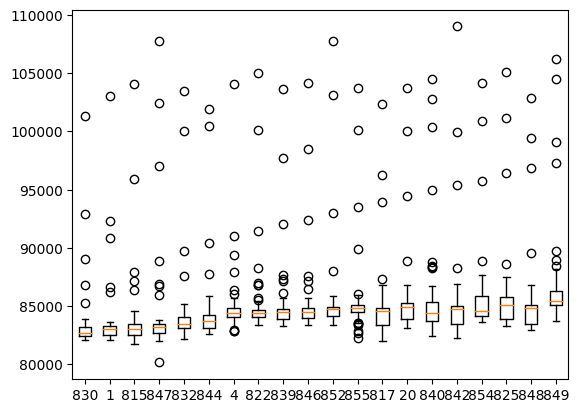

In [16]:
# plot this sucker
fig, ax = plt.subplots()
ax.boxplot(drivers_dict.values())
ax.set_xticklabels(drivers_dict.keys())

